 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [2]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function

def ReLu(inp):
    outp = inp.copy()
    outp[outp < 0] = 0
    return outp
#Complete the below function to impliment gradient of ReLU activation function

def gradReLu(inp):
    grad = np.ones_like(inp)
    grad[inp <= 0] = 0
    return grad
#Complete the below function to impliment softmax activation function

def softmax(inp):
    x = np.array(inp, copy=True)
    if x.ndim == 1:
        x = x - np.max(x)
        e = np.exp(x)
        outp= e / np.sum(e)
        return outp
    # subtract max per sample for stability
    x = x - np.max(x, axis=1, keepdims=True)
    e = np.exp(x)
    outp= e / np.sum(e, axis=1, keepdims=True)
    return outp

##################################################
# Forward & Backward
##################################################
def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights
    Z1 = inputs.dot(W1)
    A1 = ReLu(Z1)
    Z2 = A1.dot(W2)
    A2 = ReLu(Z2)
    Z3 = A2.dot(W3)
    A3 = softmax(Z3)
    return [A3, A1, A2]

def computeGradients(inputs, targets, weights, activations):
    #Inputs: input data, targets, parameters of network, intermediate activations

    W1, W2, W3 = weights
    A3, A1, A2 = activations

    # Compute the loss (already incorporated in the gradient calculation)
    if targets.ndim == 1 or targets.shape[1] == 1:
        T = np.zeros_like(A3)
        for i in range(targets.shape[0]):
            T[i, int(targets[i])] = 1
    else:
        T = targets

    m = inputs.shape[0]
    dZ3 = (A3 - T) / m
    dj_dw3 = A2.T.dot(dZ3)

    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * (A2 > 0)
    dj_dw2 = A1.T.dot(dZ2)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * (A1 > 0)
    dj_dw1 = inputs.T.dot(dZ1)

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]



def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
    W1, W2, W3    = weights
    dW1, dW2, dW3 = gradients
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    W3 = W3 - learning_rate * dW3
    #Return the updated parameters
    return [W1, W2, W3]

def backPropagate(inputs, targets, weights, activations, learning_rate):
    #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    #Compute the gradients
    grads   = computeGradients(inputs, targets, weights, activations)
    #Update the paramters using gradients
    weights = applyGradients(weights, grads, learning_rate)
    #Return the updated parameters
    return weights

##################################################
#Train the network
##################################################
#Complete the below function to complete the training of network

def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
    hidden_units = 512
    n_classes    = 10
    n_samples    = inputs.shape[0]
    n_batches    = int((n_samples * train_val_split) // batch_size)

    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split = int(n_samples * train_val_split)
    tr_idx, va_idx = idx[:split], idx[split:]
    X_tr, y_tr = inputs[tr_idx], targets_idx[tr_idx]
    X_va, y_va = inputs[va_idx], targets_idx[va_idx]

    #Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]
    #Interate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        p = np.random.permutation(X_tr.shape[0])
        X_tr, y_tr = X_tr[p], y_tr[p]

        #Interate through the batches of data
        for b in range(n_batches):
            #Get the batch of data
            s, e = b * batch_size, (b + 1) * batch_size
            Xb, yb = X_tr[s:e], y_tr[s:e]
            #Forward propagation
            activations = fwdPropagate(Xb, weights)
            #Backward propagation
            weights = backPropagate(Xb, yb, weights, activations, learning_rate)

        #Compute outpus on trianing data
        #Compute training accuracy, and training error


        #Compute outputs on validation data


        #Compute validation accuracy, and validation error


        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        def metrics(X, y):
            A,_,_ = fwdPropagate(X, weights)
            preds = np.argmax(A, axis=1)
            true  = np.argmax(y, axis=1)
            acc   = np.mean(preds == true)
            loss  = -np.sum(y * np.log(A + 1e-12)) / X.shape[0]
            return loss, acc

        tr_loss, tr_acc = metrics(X_tr, y_tr)
        va_loss, va_acc = metrics(X_va, y_va)
        print(f"Epoch {epoch+1}/{epochs} – "
              f"Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.4f} | "
              f"Val Loss: {va_loss:.4f}, Acc: {va_acc:.4f}")

    return weights
    #Save the parameters of network

#Call the training function to train the network
weights = training(x_train, y_train,
                   batch_size=128, epochs=30,
                   train_val_split=0.9, learning_rate=0.01)

##################################################
#Evaluate the performance on test data
##################################################
test_acts   = fwdPropagate(x_test, weights)[0]
test_preds  = np.argmax(test_acts, axis=1)
test_true   = np.argmax(y_test, axis=1)
test_acc    = np.mean(test_preds == test_true)
test_loss   = -np.sum(y_test * np.log(test_acts + 1e-12)) / x_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/30 – Train Loss: 2.2959, Acc: 0.3506 | Val Loss: 2.2958, Acc: 0.3538
Epoch 2/30 – Train Loss: 2.2738, Acc: 0.3097 | Val Loss: 2.2734, Acc: 0.3165
Epoch 3/30 – Train Loss: 2.1266, Acc: 0.3257 | Val Loss: 2.1233, Acc: 0.3312
Epoch 4/30 – Train Loss: 1.3983, Acc: 0.5899 | Val Loss: 1.3905, Acc: 0.5975
Epoch 5/30 – Train Loss: 0.8345, Acc: 0.7622 | Val Loss: 0.8236, Acc: 0.7727
Epoch 6/30 – Train Loss: 0.6405, Acc: 0.8150 | Val Loss: 0.6257, Acc: 0.8200
Epoch 7/30 – Train Loss: 0.5431, Acc: 0.8417 | Val Loss: 0.5238, Acc: 0.8457
Epoch 8/30 – Train Loss: 0.4844, Acc: 0.8617 | Val Loss: 0.4647, Acc: 0.8642
Epoch 9/30 – Train Loss: 0.4475, Acc: 0.8722 | Val Loss: 0.4277, Acc: 0.8728
Epoch 10/30 – Train Loss: 0.4193, Acc: 0.8817 | Val Loss: 0.4009, Acc: 0.8797
Epoch 11/30 – Train Loss: 0.3987, Acc: 0.8861 | Val Loss: 0.3814, Acc: 0.8833
Epoch 12/30 – Train Loss: 0.3806, Acc: 0.89

<b> Report your observations </b>

1. Training and Validation accuracy kept on increasing over the epochs.

2. Loss values for both training and validation constantly decreased, showing good learning.

3. Final validation accuracy and test accuracy are close to each other, suggesting the model generalizes well to unseen data.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def gradSigmoid(a):
    return a * (1 - a)

def tanh_act(x):
    return np.tanh(x)
def gradTanh(a):
    return 1 - a**2

def leakyReLu(x, α=0.01):
    out = x.copy()
    out[out < 0] *= α
    return out
def gradLeakyReLu(a, α=0.01):
    grad = np.ones_like(a)
    grad[a < 0] = α
    return grad

activations = {
    'Sigmoid':    (sigmoid,    gradSigmoid),
    'Tanh':       (tanh_act,   gradTanh),
    'ReLU':       (ReLu,       gradReLu),
    'LeakyReLU':  (leakyReLu,  gradLeakyReLu),
}

results = {}

for name, (act_fn, grad_fn) in activations.items():
    print(f"\n=== Training with {name} activation ===")

    globals()['ReLu']      = act_fn
    globals()['gradReLu']  = grad_fn

    weights = training(
        x_train, y_train,
        batch_size=128,
        epochs=30,
        train_val_split=0.9,
        learning_rate=0.01
    )

    test_probs = fwdPropagate(x_test, weights)[0]
    test_preds = np.argmax(test_probs, axis=1)
    test_true  = np.argmax(y_test, axis=1)
    acc = np.mean(test_preds == test_true)

    results[name] = acc
    print(f"{name} Test Accuracy: {acc:.4f}")

##################################################
#Evaluate the performance on MNIST test data
##################################################

print("\n--- Summary of Test Accuracies ---")
for name, acc in results.items():
    print(f"{name:10s}: {acc:.4f}")



=== Training with Sigmoid activation ===
Epoch 1/30 – Train Loss: 2.3028, Acc: 0.0975 | Val Loss: 2.3037, Acc: 0.0965
Epoch 2/30 – Train Loss: 2.2997, Acc: 0.1122 | Val Loss: 2.2999, Acc: 0.1138
Epoch 3/30 – Train Loss: 2.2986, Acc: 0.1122 | Val Loss: 2.2993, Acc: 0.1138
Epoch 4/30 – Train Loss: 2.2934, Acc: 0.1122 | Val Loss: 2.2932, Acc: 0.1138
Epoch 5/30 – Train Loss: 2.2805, Acc: 0.1988 | Val Loss: 2.2808, Acc: 0.1987
Epoch 6/30 – Train Loss: 2.2268, Acc: 0.2705 | Val Loss: 2.2264, Acc: 0.2632
Epoch 7/30 – Train Loss: 1.9671, Acc: 0.3346 | Val Loss: 1.9638, Acc: 0.3315
Epoch 8/30 – Train Loss: 1.5622, Acc: 0.4611 | Val Loss: 1.5564, Acc: 0.4563
Epoch 9/30 – Train Loss: 1.3181, Acc: 0.5338 | Val Loss: 1.3126, Acc: 0.5287
Epoch 10/30 – Train Loss: 1.0979, Acc: 0.6268 | Val Loss: 1.0962, Acc: 0.6212
Epoch 11/30 – Train Loss: 0.9263, Acc: 0.6729 | Val Loss: 0.9325, Acc: 0.6638
Epoch 12/30 – Train Loss: 0.8380, Acc: 0.7175 | Val Loss: 0.8474, Acc: 0.7120
Epoch 13/30 – Train Loss: 0.784

<b> Report your observations </b>

1. ReLU and LeakyReLU performed best while sigmoid performed worst due to vanishing gradients in sigmoid activation function.

2. Tanh outperformed sigmoid because of its symmetric output range. (-1 to 1)

3. LeakyReLU and ReLU have nearly same performance.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

def training_with_adam(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int((n_samples * train_val_split) // batch_size)

    #Split data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split = int(n_samples * train_val_split)
    tr_idx, va_idx = idx[:split], idx[split:]
    X_tr, y_tr = inputs[tr_idx], targets_idx[tr_idx]
    X_va, y_va = inputs[va_idx], targets_idx[va_idx]

    #Initialize weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    #Adam parameters
    beta1, beta2 = 0.9, 0.999
    epsilon = 1e-8
    m = [np.zeros_like(w) for w in weights]
    v = [np.zeros_like(w) for w in weights]
    t = 0

    for epoch in range(epochs):
        #Shuffle data
        p = np.random.permutation(X_tr.shape[0])
        X_tr, y_tr = X_tr[p], y_tr[p]

        for b in range(n_batches):
            t += 1
            #Get batch
            s, e = b * batch_size, (b + 1) * batch_size
            Xb, yb = X_tr[s:e], y_tr[s:e]

            #Forward pass
            activations = fwdPropagate(Xb, weights)

            #Compute gradients
            grads = computeGradients(Xb, yb, weights, activations)

            #Adam update
            for i in range(len(weights)):
                m[i] = beta1 * m[i] + (1 - beta1) * grads[i]
                v[i] = beta2 * v[i] + (1 - beta2) * (grads[i]**2)
                m_hat = m[i] / (1 - beta1**t)
                v_hat = v[i] / (1 - beta2**t)
                weights[i] = weights[i] - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        #Calculate metrics
        def metrics(X, y):
            A,_,_ = fwdPropagate(X, weights)
            preds = np.argmax(A, axis=1)
            true = np.argmax(y, axis=1)
            acc = np.mean(preds == true)
            loss = -np.sum(y * np.log(A + 1e-12)) / X.shape[0]
            return loss, acc

        tr_loss, tr_acc = metrics(X_tr, y_tr)
        va_loss, va_acc = metrics(X_va, y_va)
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.4f} | "
              f"Val Loss: {va_loss:.4f}, Acc: {va_acc:.4f}")

    return weights

#Train with Adam
print("\n=== Training with Adam Optimizer ===")
weights_adam = training_with_adam(
    x_train, y_train,
    batch_size=128,
    epochs=30,
    train_val_split=0.9,
    learning_rate=0.001
)

#Evaluate Adam
test_acts = fwdPropagate(x_test, weights_adam)[0]
test_preds = np.argmax(test_acts, axis=1)
test_true = np.argmax(y_test, axis=1)
adam_acc = np.mean(test_preds == test_true)
adam_loss = -np.sum(y_test * np.log(test_acts + 1e-12)) / x_test.shape[0]
print(f"Adam Test Loss: {adam_loss:.4f}, Test Acc: {adam_acc:.4f}")

##################################################
#Compare the accuracies and report your observations
##################################################

#Get SGD results
sgd_acc = 0.9386

print(f"SGD Test Accuracy:  {sgd_acc:.4f}")
print(f"Adam Test Accuracy: {adam_acc:.4f}")


=== Training with Adam Optimizer ===
Epoch 1/30 - Train Loss: 0.1503, Acc: 0.9550 | Val Loss: 0.1772, Acc: 0.9482
Epoch 2/30 - Train Loss: 0.0793, Acc: 0.9754 | Val Loss: 0.1220, Acc: 0.9657
Epoch 3/30 - Train Loss: 0.0510, Acc: 0.9841 | Val Loss: 0.1046, Acc: 0.9693
Epoch 4/30 - Train Loss: 0.0444, Acc: 0.9859 | Val Loss: 0.0960, Acc: 0.9732
Epoch 5/30 - Train Loss: 0.0278, Acc: 0.9911 | Val Loss: 0.0966, Acc: 0.9723
Epoch 6/30 - Train Loss: 0.0220, Acc: 0.9929 | Val Loss: 0.0907, Acc: 0.9767
Epoch 7/30 - Train Loss: 0.0199, Acc: 0.9936 | Val Loss: 0.1008, Acc: 0.9750
Epoch 8/30 - Train Loss: 0.0160, Acc: 0.9951 | Val Loss: 0.1031, Acc: 0.9742
Epoch 9/30 - Train Loss: 0.0120, Acc: 0.9959 | Val Loss: 0.1035, Acc: 0.9760
Epoch 10/30 - Train Loss: 0.0122, Acc: 0.9960 | Val Loss: 0.1003, Acc: 0.9772
Epoch 11/30 - Train Loss: 0.0134, Acc: 0.9957 | Val Loss: 0.1211, Acc: 0.9740
Epoch 12/30 - Train Loss: 0.0074, Acc: 0.9975 | Val Loss: 0.1112, Acc: 0.9777
Epoch 13/30 - Train Loss: 0.0084, A

<b> Report your observations </b>

1. The model reaches around 95% accuracy in just 1 epoch with Adam, compared to SGD which took many epochs to reach similar performance.

2. Adam optimizer acheives better finally accuracy than SGD.

3. The accuracy stays high and stable on both training and validation data, showing it learns well without sudden drops.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
# Training with weight regularization
##################################################

def training_l2(inputs, targets_idx,
                batch_size=128, epochs=30,
                train_val_split=0.9,
                learning_rate=0.01,
                lambda_reg=0.001):
    hidden_units = 512
    n_classes    = 10
    n_samples    = inputs.shape[0]
    n_batches    = int((n_samples * train_val_split) // batch_size)

    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split = int(n_samples * train_val_split)
    tr_idx, va_idx = idx[:split], idx[split:]
    X_tr, y_tr = inputs[tr_idx], targets_idx[tr_idx]
    X_va, y_va = inputs[va_idx], targets_idx[va_idx]

    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        p = np.random.permutation(X_tr.shape[0])
        X_tr, y_tr = X_tr[p], y_tr[p]

        for b in range(n_batches):
            s, e = b*batch_size, (b+1)*batch_size
            Xb, yb = X_tr[s:e], y_tr[s:e]
            acts = fwdPropagate(Xb, weights)
            grads = computeGradients(Xb, yb, weights, acts)
            grads = [
                grads[0] + lambda_reg * weights[0],
                grads[1] + lambda_reg * weights[1],
                grads[2] + lambda_reg * weights[2]
            ]
            weights = applyGradients(weights, grads, learning_rate)

        def metrics(X, y):
            A,_,_ = fwdPropagate(X, weights)
            loss = -np.sum(y * np.log(A + 1e-12)) / X.shape[0]
            reg = (lambda_reg/2) * (
                np.sum(weights[0]**2) +
                np.sum(weights[1]**2) +
                np.sum(weights[2]**2)
            ) / X.shape[0]
            preds = np.argmax(A, axis=1)
            true  = np.argmax(y, axis=1)
            acc   = np.mean(preds == true)
            return loss + reg, acc

        tr_loss, tr_acc = metrics(X_tr, y_tr)
        va_loss, va_acc = metrics(X_va, y_va)
        print(f"Epoch {epoch+1}/{epochs} – "
              f"Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.4f} | "
              f"Val Loss: {va_loss:.4f}, Acc: {va_acc:.4f}")

    return weights

weights_l2 = training_l2(x_train, y_train)
A_l2 = fwdPropagate(x_test, weights_l2)[0]
acc_l2 = np.mean(np.argmax(A_l2, axis=1) == np.argmax(y_test, axis=1))
print(f"Weight Reg Test Acc: {acc_l2:.4f}")


##################################################
# Training with dropout strategy
##################################################

def training_dropout(inputs, targets_idx,
                     batch_size=128, epochs=30,
                     train_val_split=0.9,
                     learning_rate=0.01,
                     p=0.2):
    hidden_units = 512
    n_classes    = 10
    n_samples    = inputs.shape[0]
    n_batches    = int((n_samples * train_val_split) // batch_size)

    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split = int(n_samples * train_val_split)
    tr_idx, va_idx = idx[:split], idx[split:]
    X_tr, y_tr = inputs[tr_idx], targets_idx[tr_idx]
    X_va, y_va = inputs[va_idx], targets_idx[va_idx]

    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        p_idx = np.random.permutation(X_tr.shape[0])
        X_tr, y_tr = X_tr[p_idx], y_tr[p_idx]

        for b in range(n_batches):
            s, e = b*batch_size, (b+1)*batch_size
            Xb, yb = X_tr[s:e], y_tr[s:e]

            # forward with dropout
            Z1 = Xb.dot(weights[0]); A1 = ReLu(Z1)
            mask1 = (np.random.rand(*A1.shape) > p) / (1-p); A1 *= mask1
            Z2 = A1.dot(weights[1]); A2 = ReLu(Z2)
            mask2 = (np.random.rand(*A2.shape) > p) / (1-p); A2 *= mask2
            Z3 = A2.dot(weights[2]); A3 = softmax(Z3)

            # backward with masks
            m = Xb.shape[0]
            T = yb
            dZ3 = (A3 - T) / m
            dW3 = A2.T.dot(dZ3)
            dA2 = dZ3.dot(weights[2].T) * mask2
            dZ2 = dA2 * (A2 > 0)
            dW2 = A1.T.dot(dZ2)
            dA1 = dZ2.dot(weights[1].T) * mask1
            dZ1 = dA1 * (A1 > 0)
            dW1 = Xb.T.dot(dZ1)

            grads = [dW1, dW2, dW3]
            weights = applyGradients(weights, grads, learning_rate)

        def metrics(X, y):
            A,_,_ = fwdPropagate(X, weights)
            preds = np.argmax(A, axis=1)
            true  = np.argmax(y, axis=1)
            acc   = np.mean(preds == true)
            loss  = -np.sum(y * np.log(A + 1e-12)) / X.shape[0]
            return loss, acc

        tr_loss, tr_acc = metrics(X_tr, y_tr)
        va_loss, va_acc = metrics(X_va, y_va)
        print(f"Epoch {epoch+1}/{epochs} – "
              f"Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.4f} | "
              f"Val Loss: {va_loss:.4f}, Acc: {va_acc:.4f}")

    return weights

weights_do = training_dropout(x_train, y_train)
A_do = fwdPropagate(x_test, weights_do)[0]
acc_do = np.mean(np.argmax(A_do, axis=1) == np.argmax(y_test, axis=1))
print(f"Dropout Test Acc: {acc_do:.4f}")


##################################################
# Training with early stopping criterion
##################################################

def training_early_stopping(inputs, targets_idx,
                            batch_size=128, max_epochs=30,
                            train_val_split=0.9,
                            learning_rate=0.01,
                            patience=3):
    hidden_units = 512
    n_classes    = 10
    n_samples    = inputs.shape[0]
    n_batches    = int((n_samples * train_val_split) // batch_size)

    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    split = int(n_samples * train_val_split)
    tr_idx, va_idx = idx[:split], idx[split:]
    X_tr, y_tr = inputs[tr_idx], targets_idx[tr_idx]
    X_va, y_va = inputs[va_idx], targets_idx[va_idx]

    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    best_val_loss = float('inf')
    wait = 0
    best_weights = [w.copy() for w in weights]

    for epoch in range(max_epochs):
        p_idx = np.random.permutation(X_tr.shape[0])
        X_tr, y_tr = X_tr[p_idx], y_tr[p_idx]

        for b in range(n_batches):
            s, e = b*batch_size, (b+1)*batch_size
            Xb, yb = X_tr[s:e], y_tr[s:e]
            acts = fwdPropagate(Xb, weights)
            weights = backPropagate(Xb, yb, weights, acts, learning_rate)

        def metrics(X, y):
            A,_,_ = fwdPropagate(X, weights)
            preds = np.argmax(A, axis=1)
            true  = np.argmax(y, axis=1)
            acc   = np.mean(preds == true)
            loss  = -np.sum(y * np.log(A + 1e-12)) / X.shape[0]
            return loss, acc

        tr_loss, tr_acc = metrics(X_tr, y_tr)
        va_loss, va_acc = metrics(X_va, y_va)
        print(f"Epoch {epoch+1}/{max_epochs} – "
              f"Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.4f} | "
              f"Val Loss: {va_loss:.4f}, Acc: {va_acc:.4f}")

        if va_loss < best_val_loss:
            best_val_loss = va_loss
            best_weights = [w.copy() for w in weights]
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return best_weights

weights_es = training_early_stopping(x_train, y_train)
A_es = fwdPropagate(x_test, weights_es)[0]
acc_es = np.mean(np.argmax(A_es, axis=1) == np.argmax(y_test, axis=1))
print(f"Early Stopping Test Acc: {acc_es:.4f}")


Epoch 1/30 – Train Loss: 2.2956, Acc: 0.4504 | Val Loss: 2.2957, Acc: 0.4577
Epoch 2/30 – Train Loss: 2.2723, Acc: 0.3206 | Val Loss: 2.2728, Acc: 0.3218
Epoch 3/30 – Train Loss: 2.1184, Acc: 0.3627 | Val Loss: 2.1227, Acc: 0.3548
Epoch 4/30 – Train Loss: 1.3758, Acc: 0.6464 | Val Loss: 1.3870, Acc: 0.6428
Epoch 5/30 – Train Loss: 0.8273, Acc: 0.7594 | Val Loss: 0.8353, Acc: 0.7597
Epoch 6/30 – Train Loss: 0.6457, Acc: 0.8081 | Val Loss: 0.6520, Acc: 0.8097
Epoch 7/30 – Train Loss: 0.5473, Acc: 0.8406 | Val Loss: 0.5546, Acc: 0.8415
Epoch 8/30 – Train Loss: 0.4891, Acc: 0.8580 | Val Loss: 0.4988, Acc: 0.8577
Epoch 9/30 – Train Loss: 0.4488, Acc: 0.8710 | Val Loss: 0.4602, Acc: 0.8688
Epoch 10/30 – Train Loss: 0.4197, Acc: 0.8808 | Val Loss: 0.4310, Acc: 0.8805
Epoch 11/30 – Train Loss: 0.3972, Acc: 0.8872 | Val Loss: 0.4105, Acc: 0.8857
Epoch 12/30 – Train Loss: 0.3800, Acc: 0.8914 | Val Loss: 0.3936, Acc: 0.8903
Epoch 13/30 – Train Loss: 0.3662, Acc: 0.8952 | Val Loss: 0.3802, Acc: 0.

<b> Report your observations </b>

1. Dropout performed best as compared to other two.

2. The model's performance improved steadily without big ups and downs, showing more reliable learning.

3. Each regularization technique achieved over 93.5% accuracy, proving they all successfully controlled overfitting compared to unregularized models.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



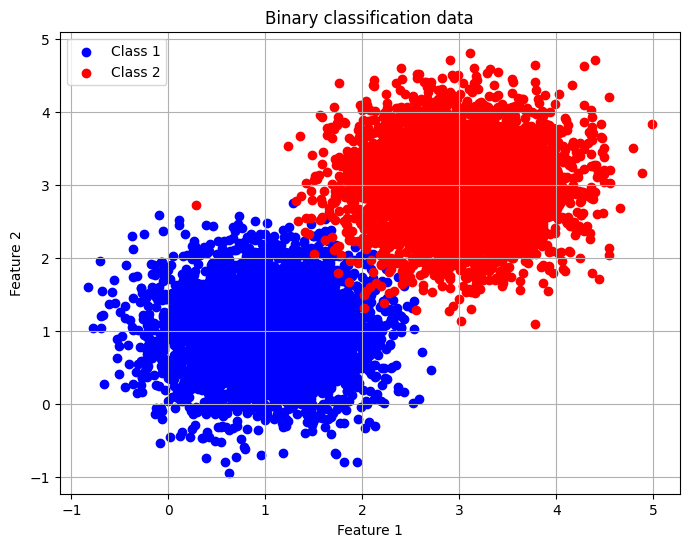

In [1]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


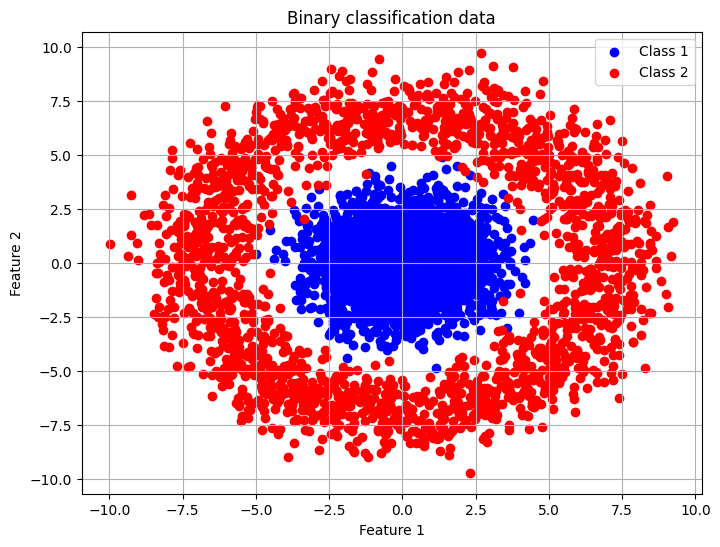

In [3]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Linear model on linearly separable data accuracy: 99.60%


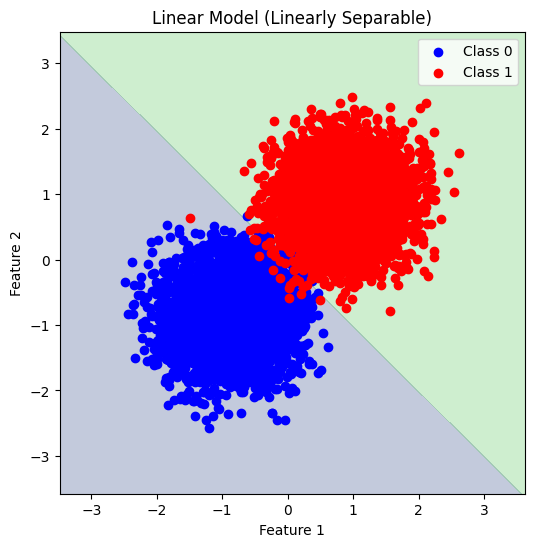

Training on Linearly Separable Data:


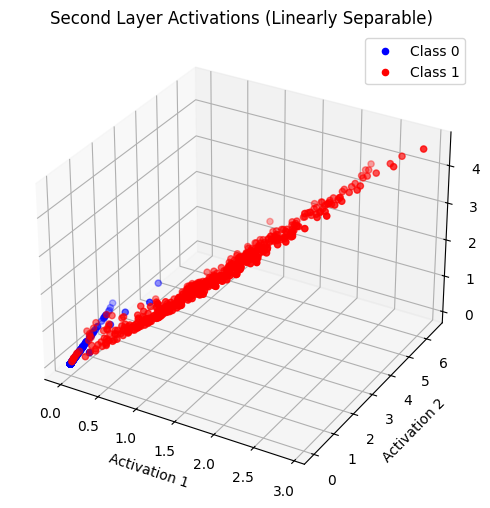

DNN on linearly separable data accuracy: 91.20%


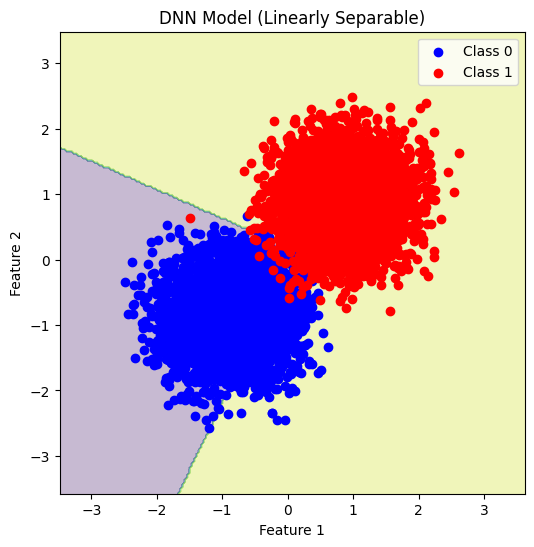

Comparison (Linearly Separable):
  Linear Model: 99.60%
  Deep NN    : 91.20%


In [13]:
##################################################
# Classify the linearly separable data using linear classification models
##################################################

def Logistic_Regression(X_train, y_train, X_test, max_iter=20):
    # Add bias term
    X = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    y = y_train.reshape(-1, 1)
    # Initialize weights
    w = np.zeros((X.shape[1], 1))
    for i in range(max_iter):
        z = X.dot(w)
        mu = 1 / (1 + np.exp(-z))
        W = np.diag((mu * (1 - mu)).flatten())
        grad = X.T.dot(mu - y)
        H = X.T.dot(W).dot(X)
        w -= np.linalg.inv(H).dot(grad)
    # Predict on test set
    probs = 1 / (1 + np.exp(-X_test_aug.dot(w)))
    y_pred = (probs >= 0.5).astype(int).flatten()
    return w, y_pred

def plot_decision_regions(X, y, w, title='Decision Regions'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_aug = np.hstack([np.ones((grid.shape[0],1)), grid])
    Z = (1 / (1 + np.exp(-grid_aug.dot(w))) >= 0.5).reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
    plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Train & evaluate logistic regression on linearly separable data
w_lin, y_pred_lin = Logistic_Regression(tr_data_norm, tr_targets, te_data_norm)
acc_lin = np.mean(y_pred_lin == te_targets)
print(f"Linear model on linearly separable data accuracy: {acc_lin*100:.2f}%")
plot_decision_regions(tr_data_norm, tr_targets, w_lin, title='Linear Model (Linearly Separable)')

##################################################
# Classify the linearly separable data using deep neural based classification models
##################################################

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def train_nn(X_train, y_train, X_test, y_test, epochs=500, lr=0.001):
    """
    Train a 3-layer neural network using numpy.
    Returns weights and test accuracy.
    """
    np.random.seed(0)
    # He initialization for ReLU
    W1 = np.random.randn(3, 2) * np.sqrt(2 / 2)  # 3x2
    b1 = np.zeros((3, 1))
    W2 = np.random.randn(3, 3) * np.sqrt(2 / 3)  # 3x3
    b2 = np.zeros((3, 1))
    W3 = np.random.randn(1, 3) * np.sqrt(2 / 3)  # 1x3
    b3 = np.zeros((1, 1))

    y_train = y_train.reshape(-1, 1)
    m = X_train.shape[0]

    # Learning rate decay
    initial_lr = lr
    decay_rate = 0.1
    for epoch in range(epochs):
        lr = initial_lr / (1 + decay_rate * (epoch / epochs))

        # Forward pass
        Z1 = W1.dot(X_train.T) + b1
        A1 = relu(Z1)  # First layer: ReLU
        Z2 = W2.dot(A1) + b2
        A2 = relu(Z2)  # Second layer: ReLU
        Z3 = W3.dot(A2) + b3
        A3 = sigmoid(Z3)  # Output layer: Sigmoid

        # Compute loss (binary cross-entropy)
        loss = -np.mean(y_train * np.log(A3.T + 1e-8) + (1 - y_train) * np.log(1 - A3.T + 1e-8))

        # Backward pass
        dZ3 = A3 - y_train.T
        dW3 = (1/m) * dZ3.dot(A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        dA2 = W3.T.dot(dZ3)
        dZ2 = dA2 * (Z2 > 0)  # ReLU derivative
        dW2 = (1/m) * dZ2.dot(A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = W2.T.dot(dZ2)
        dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
        dW1 = (1/m) * dZ1.dot(X_train)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Update weights
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
        W3 -= lr * dW3
        b3 -= lr * db3

    # Test predictions
    Z1 = W1.dot(X_test.T) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = relu(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = sigmoid(Z3)
    y_pred = (A3.T >= 0.5).astype(int).flatten()

    # Compute test accuracy
    accuracy = np.mean(y_pred == y_test)

    # Visualize second layer activations (A2)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(A2[0, y_test==0], A2[1, y_test==0], A2[2, y_test==0],
               color='blue', label='Class 0')
    ax.scatter(A2[0, y_test==1], A2[1, y_test==1], A2[2, y_test==1],
               color='red', label='Class 1')
    ax.set_xlabel('Activation 1')
    ax.set_ylabel('Activation 2')
    ax.set_zlabel('Activation 3')
    plt.title('Second Layer Activations (Linearly Separable)')
    plt.legend()
    plt.show()

    return [W1, b1, W2, b2, W3, b3], accuracy

# For linearly separable data
print("Training on Linearly Separable Data:")
dnn_weights, dnn_accuracy_linear = train_nn(tr_data_norm, tr_targets, te_data_norm, te_targets, epochs=500, lr=0.001)
print(f"DNN on linearly separable data accuracy: {dnn_accuracy_linear*100:.2f}%")

# Plot DNN decision regions
def plot_dnn_decision_regions(X, y, weights, title='DNN Decision Regions'):
    W1, b1, W2, b2, W3, b3 = weights
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Forward pass for grid
    Z1 = W1.dot(grid.T) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = relu(Z2)
    Z3 = W3.dot(A2) + b3
    Z = sigmoid(Z3)
    Z = (Z >= 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
    plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_dnn_decision_regions(tr_data_norm, tr_targets, dnn_weights, title='DNN Model (Linearly Separable)')

##################################################
# Compare the performance of both the models on linearly separable data
##################################################
print(f"Comparison (Linearly Separable):\n"
      f"  Linear Model: {acc_lin*100:.2f}%\n"
      f"  Deep NN    : {dnn_accuracy_linear*100:.2f}%")


Linear model on non-linearly separable data accuracy: 53.00%


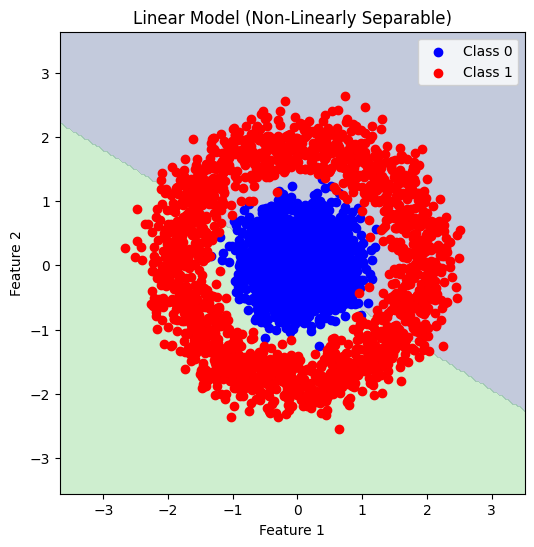

Deep NN on non-linearly separable data accuracy: 99.75%


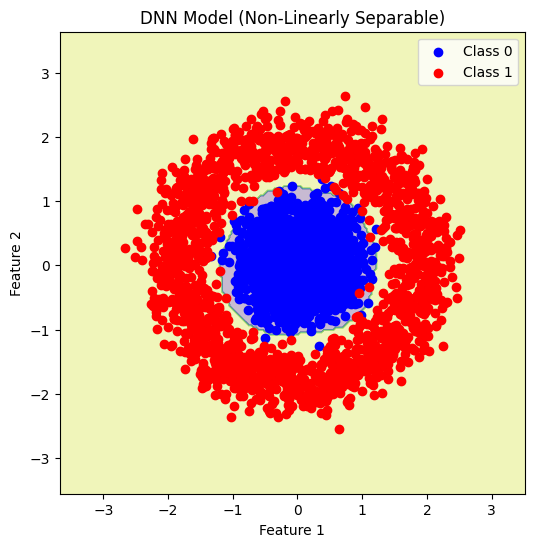

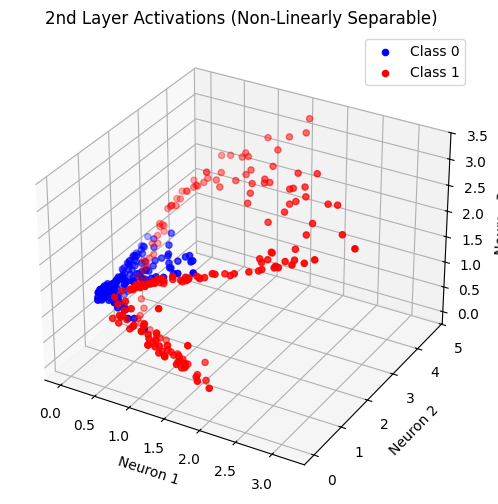

Comparison (Non-Linearly Separable):
  Linear Model: 53.00%
  Deep NN    : 99.75%


In [17]:
# Helper functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def Logistic_Regression(X_train, y_train, X_test, max_iter=20):
    # Add bias term
    X = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    y = y_train.reshape(-1, 1)
    # Initialize weights
    w = np.zeros((X.shape[1], 1))
    for i in range(max_iter):
        z = X.dot(w)
        mu = 1 / (1 + np.exp(-z))
        W = np.diag((mu * (1 - mu)).flatten())
        grad = X.T.dot(mu - y)
        H = X.T.dot(W).dot(X)
        w -= np.linalg.inv(H).dot(grad)
    # Predict on test set
    probs = 1 / (1 + np.exp(-X_test_aug.dot(w)))
    y_pred = (probs >= 0.5).astype(int).flatten()
    return w, y_pred

def plot_decision_regions(X, y, w, title='Decision Regions'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_aug = np.hstack([np.ones((grid.shape[0],1)), grid])
    Z = (1 / (1 + np.exp(-grid_aug.dot(w))) >= 0.5).reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
    plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Normalize data
def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0) + 1e-8
    return (X - mean) / std, mean, std

##################################################
# Classify the non-linearly separable data using linear classification models
##################################################

# Prepare data
data_nl = np.vstack([class1_data, class2_data])
targets_nl = np.hstack([np.zeros(len(class1_data)), np.ones(len(class2_data))])
idx = np.arange(len(data_nl))
np.random.seed(0)
np.random.shuffle(idx)
split_pt = int(0.9 * len(idx))
train_idx, test_idx = idx[:split_pt], idx[split_pt:]
X_nl_tr, Y_nl_tr = data_nl[train_idx], targets_nl[train_idx]
X_nl_te, Y_nl_te = data_nl[test_idx], targets_nl[test_idx]

# Normalize data
X_nl_tr_norm, mean_nl, std_nl = normalize_data(X_nl_tr)
X_nl_te_norm = (X_nl_te - mean_nl) / std_nl

# Logistic regression
w_nl, y_pred_nl = Logistic_Regression(X_nl_tr_norm, Y_nl_tr, X_nl_te_norm)
acc_lin_nl = np.mean(y_pred_nl == Y_nl_te)
print(f"Linear model on non-linearly separable data accuracy: {acc_lin_nl*100:.2f}%")
plot_decision_regions(X_nl_tr_norm, Y_nl_tr, w_nl, title='Linear Model (Non-Linearly Separable)')

##################################################
# Classify the non-linearly separable data using deep neural based classification models
##################################################

def train_nn_non_linear(X_train, y_train, X_test, y_test, epochs=5000, lr=0.005):
    """
    Train a 3-layer neural network for non-linearly separable data using numpy.
    Returns weights, test accuracy, and second-layer activations.
    """
    np.random.seed(1)
    # He initialization for ReLU
    n_hidden = 20  # Increased neurons
    W1 = np.random.randn(n_hidden, 2) * np.sqrt(2 / 2)  # n_hidden x 2
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(n_hidden, n_hidden) * np.sqrt(2 / n_hidden)  # n_hidden x n_hidden
    b2 = np.zeros((n_hidden, 1))
    W3 = np.random.randn(1, n_hidden) * np.sqrt(2 / n_hidden)  # 1 x n_hidden
    b3 = np.zeros((1, 1))

    y_train = y_train.reshape(-1, 1)
    m = X_train.shape[0]

    # Momentum
    v_dW1 = np.zeros_like(W1)
    v_db1 = np.zeros_like(b1)
    v_dW2 = np.zeros_like(W2)
    v_db2 = np.zeros_like(b2)
    v_dW3 = np.zeros_like(W3)
    v_db3 = np.zeros_like(b3)
    beta = 0.95  # Increased momentum

    # Learning rate decay
    initial_lr = lr
    decay_rate = 0.1
    for epoch in range(epochs):
        lr = initial_lr / (1 + decay_rate * (epoch / epochs))

        # Forward pass
        Z1 = W1.dot(X_train.T) + b1
        A1 = relu(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = relu(Z2)
        Z3 = W3.dot(A2) + b3
        A3 = sigmoid(Z3)

        # Backward pass
        dZ3 = A3 - y_train.T
        dW3 = (1/m) * dZ3.dot(A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        dA2 = W3.T.dot(dZ3)
        dZ2 = dA2 * (Z2 > 0)
        dW2 = (1/m) * dZ2.dot(A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = W2.T.dot(dZ2)
        dZ1 = dA1 * (Z1 > 0)
        dW1 = (1/m) * dZ1.dot(X_train)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Gradient clipping
        clip_value = 1.0
        dW1 = np.clip(dW1, -clip_value, clip_value)
        db1 = np.clip(db1, -clip_value, clip_value)
        dW2 = np.clip(dW2, -clip_value, clip_value)
        db2 = np.clip(db2, -clip_value, clip_value)
        dW3 = np.clip(dW3, -clip_value, clip_value)
        db3 = np.clip(db3, -clip_value, clip_value)

        # Update with momentum
        v_dW1 = beta * v_dW1 + (1 - beta) * dW1
        v_db1 = beta * v_db1 + (1 - beta) * db1
        v_dW2 = beta * v_dW2 + (1 - beta) * dW2
        v_db2 = beta * v_db2 + (1 - beta) * db2
        v_dW3 = beta * v_dW3 + (1 - beta) * dW3
        v_db3 = beta * v_db3 + (1 - beta) * db3

        W1 -= lr * v_dW1
        b1 -= lr * v_db1
        W2 -= lr * v_dW2
        b2 -= lr * v_db2
        W3 -= lr * v_dW3
        b3 -= lr * v_db3

    # Evaluate on test set
    Z1_te = W1.dot(X_test.T) + b1
    A1_te = relu(Z1_te)
    Z2_te = W2.dot(A1_te) + b2
    A2_te = relu(Z2_te)
    Z3_te = W3.dot(A2_te) + b3
    A3_te = sigmoid(Z3_te)
    y_pred = (A3_te.T >= 0.5).astype(int).flatten()
    acc = np.mean(y_pred == y_test)

    return [W1, b1, W2, b2, W3, b3], acc, A2_te

# Train DNN
dnn_weights_nl, acc_dnn_nl, A2_te_nl = train_nn_non_linear(X_nl_tr_norm, Y_nl_tr, X_nl_te_norm, Y_nl_te, epochs=5000, lr=0.005)
print(f"Deep NN on non-linearly separable data accuracy: {acc_dnn_nl*100:.2f}%")

# Plot DNN decision regions
def plot_dnn_decision_regions(X, y, weights, title='DNN Decision Regions'):
    W1, b1, W2, b2, W3, b3 = weights
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Forward pass for grid
    Z1 = W1.dot(grid.T) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = relu(Z2)
    Z3 = W3.dot(A2) + b3
    Z = sigmoid(Z3)
    Z = (Z >= 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
    plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_dnn_decision_regions(X_nl_tr_norm, Y_nl_tr, dnn_weights_nl, title='DNN Model (Non-Linearly Separable)')

# 2nd-layer activations plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A2_te_nl[0, Y_nl_te==0], A2_te_nl[1, Y_nl_te==0], A2_te_nl[2, Y_nl_te==0],
           color='blue', label='Class 0')
ax.scatter(A2_te_nl[0, Y_nl_te==1], A2_te_nl[1, Y_nl_te==1], A2_te_nl[2, Y_nl_te==1],
           color='red', label='Class 1')
ax.set_xlabel('Neuron 1')
ax.set_ylabel('Neuron 2')
ax.set_zlabel('Neuron 3')
plt.title('2nd Layer Activations (Non-Linearly Separable)')
plt.legend()
plt.show()

##################################################
# Compare the performance of both the models on non-linearly separable data
##################################################
print(f"Comparison (Non-Linearly Separable):\n"
      f"  Linear Model: {acc_lin_nl*100:.2f}%\n"
      f"  Deep NN    : {acc_dnn_nl*100:.2f}%")


<b> Report your observations </b>

1. DNN worked better than Linear Model in case of Non-Linearly Separable Data.

2. Linear model and DNN work similarly in case of Linearly Separable Data.

3. Logistic regression gives very low accuracy in case of non-linearly separable data whereas dnn works very well.